In [129]:
import numpy as np
import pandas as pd

from globalbonds.dataio.data_lib import DataLib
from plotnine import *

dlib = DataLib('../SignalData')
dlib.list()

GDP-Real
EquityPrices
LongRates
CurrAcctNom-inUSD
CoreCPI-SA
fxTrdWts-Real
M3-inUSD
CurrAcctPctGDP
fxTrdWts-Nominal
BondRetIdx-LocalFX
fxVsUSD
M2-inUSD
M1-inUSD
ShortRates
GDP-Nominal


/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 958 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


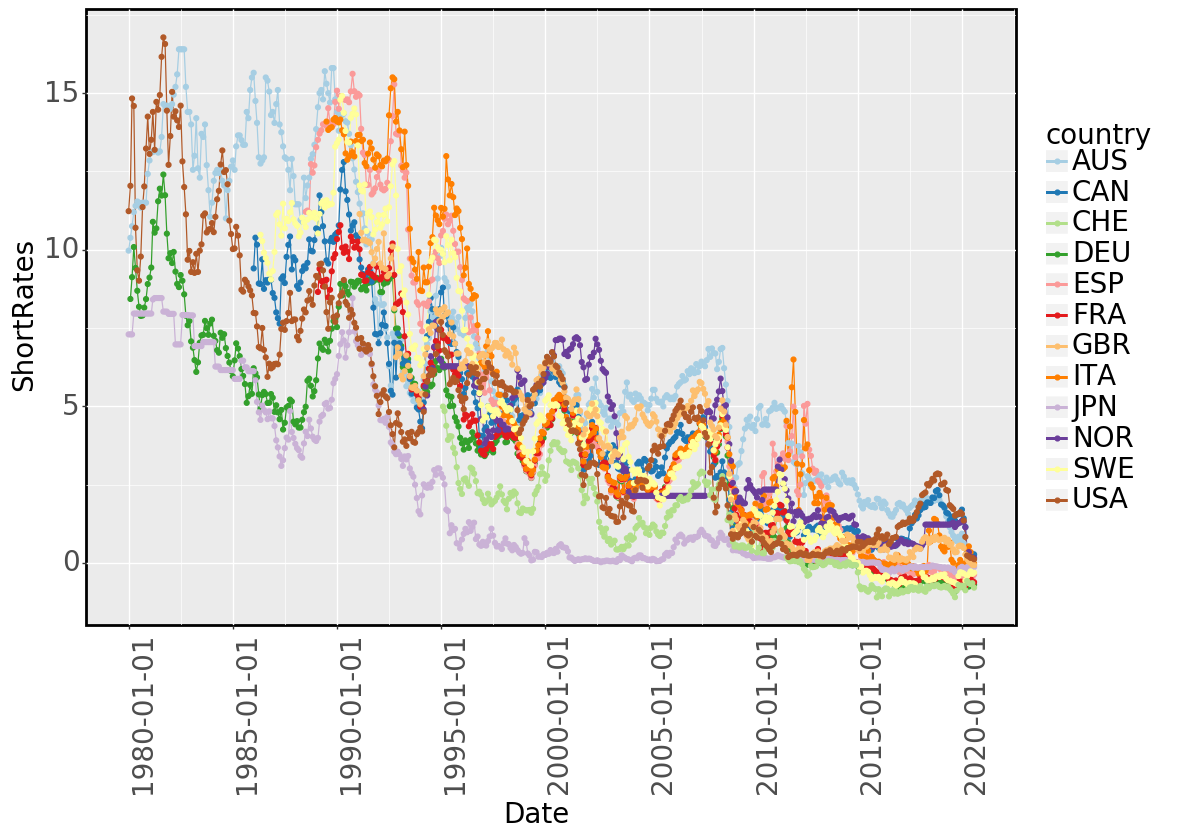

<ggplot: (8746615246470)>

In [79]:

def plot_raw(tbl, ylabel):
     return (
        ggplot(tbl, aes(x='date', y='value', color='country')) +
            geom_line() +
            geom_point() +
            scale_color_brewer(type='qualitative', palette=3) +
            ylab(ylabel) +
            xlab('Date') +
            scale_x_date() +
            #theme_minimal() +
            theme(
                text=element_text(size=20),
                figure_size=(12, 8),
                legend_position='right',
                axis_text_x=element_text(size=20, angle=90, hjust=0),
                panel_border=element_rect(colour="black", size=2),
            )
    )

    
def plot_tbl(tbl, ylabel):
    tbl['date'] = tbl.index
    try:
        tbl['date'] = tbl['date'].map(lambda x: x.to_timestamp())
    except AttributeError:
        pass
    tbl = tbl.melt(id_vars='date')
    return plot_raw(tbl, ylabel)


def plot_series(address):
    tbl = dlib.pull(address)
    return plot_tbl(tbl, address)


plot_series('ShortRates')

/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 5 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 780 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


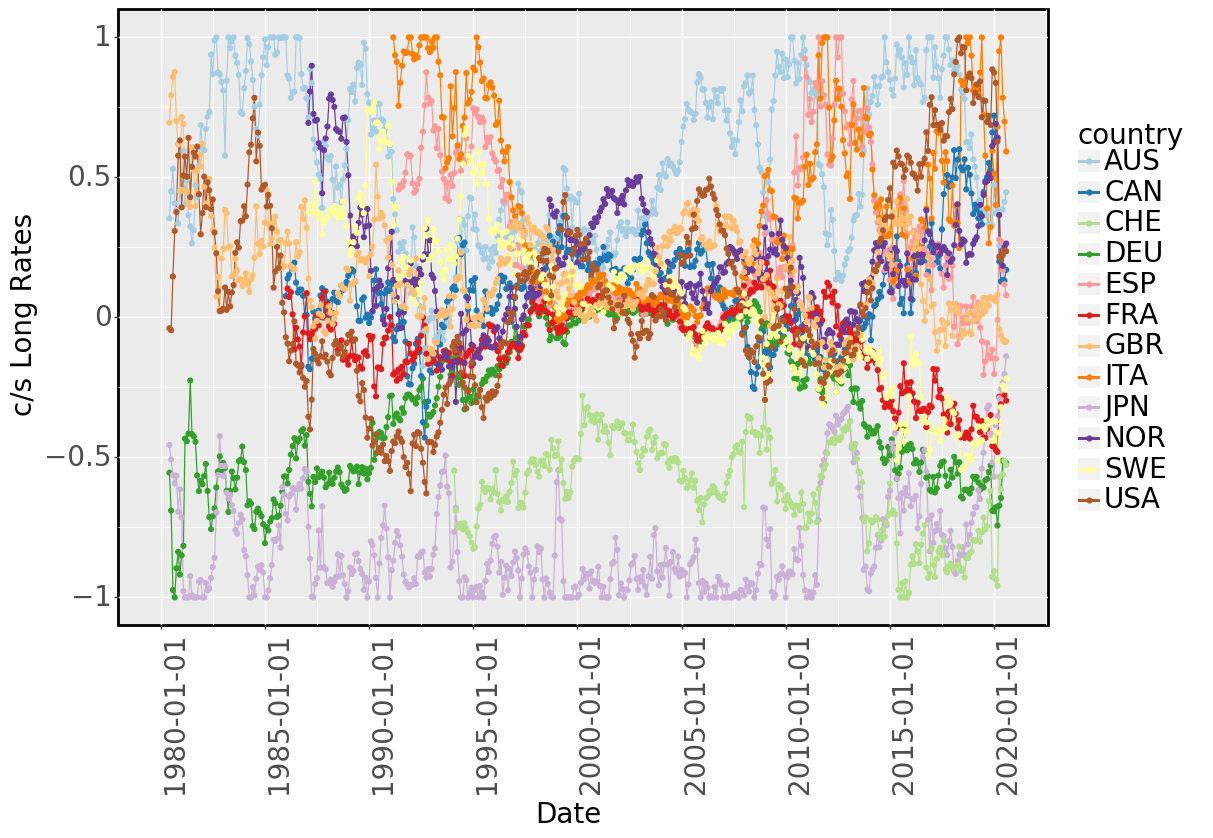

<ggplot: (8746614125744)>

In [159]:
def plot_centered_scaled(address, ylab):
    tbl = dlib.pull(address)
    center = tbl.mean(axis=1)
    centered = (tbl.T - center).T
    centered_scaled = (centered.T / centered.abs().max(axis=1)).T
    scale = centered.abs().max(axis=1).rolling(window=6).max()
    centered_scaled = (centered.T / scale).T

    return plot_tbl(centered_scaled.copy(), ylab)
    
    
plot_centered_scaled('LongRates', 'c/s Long Rates')

/home/dcdanko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dcdanko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/minicond

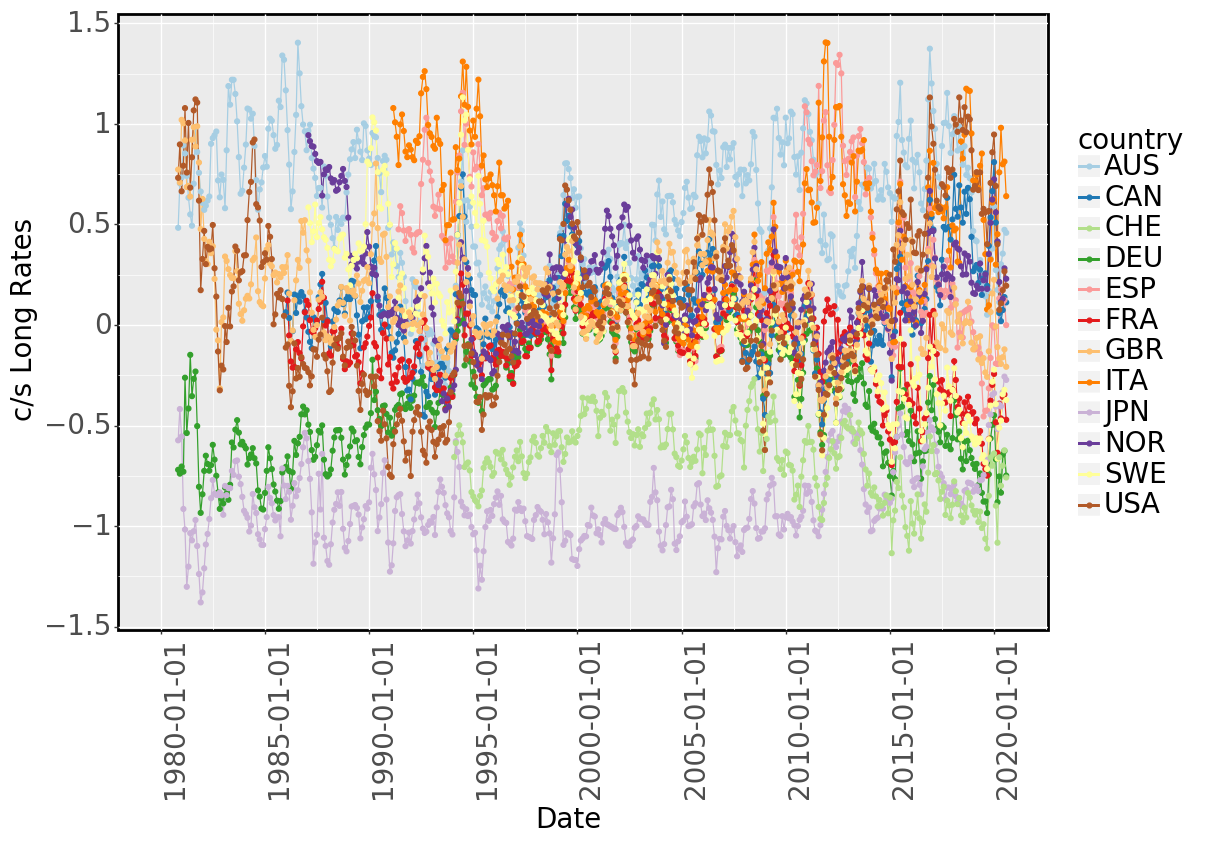

<ggplot: (8746621298885)>

In [161]:
def plot_forward_centered_scaled(address, ylab):
    tbl = dlib.pull(address)
    center = tbl.mean(axis=1).rolling(6).apply(lambda x: x[:5].mean())
    centered = (tbl.T - center).T
    centered_scaled = (centered.T / centered.abs().max(axis=1)).T
    scale = centered.abs().max(axis=1).rolling(6).apply(lambda x: x[:5].mean())
    centered_scaled = (centered.T / scale).T

    return plot_tbl(centered_scaled.copy(), ylab)
    
    
plot_forward_centered_scaled('LongRates', 'c/s Long Rates')

/home/dcdanko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dcdanko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/minicond

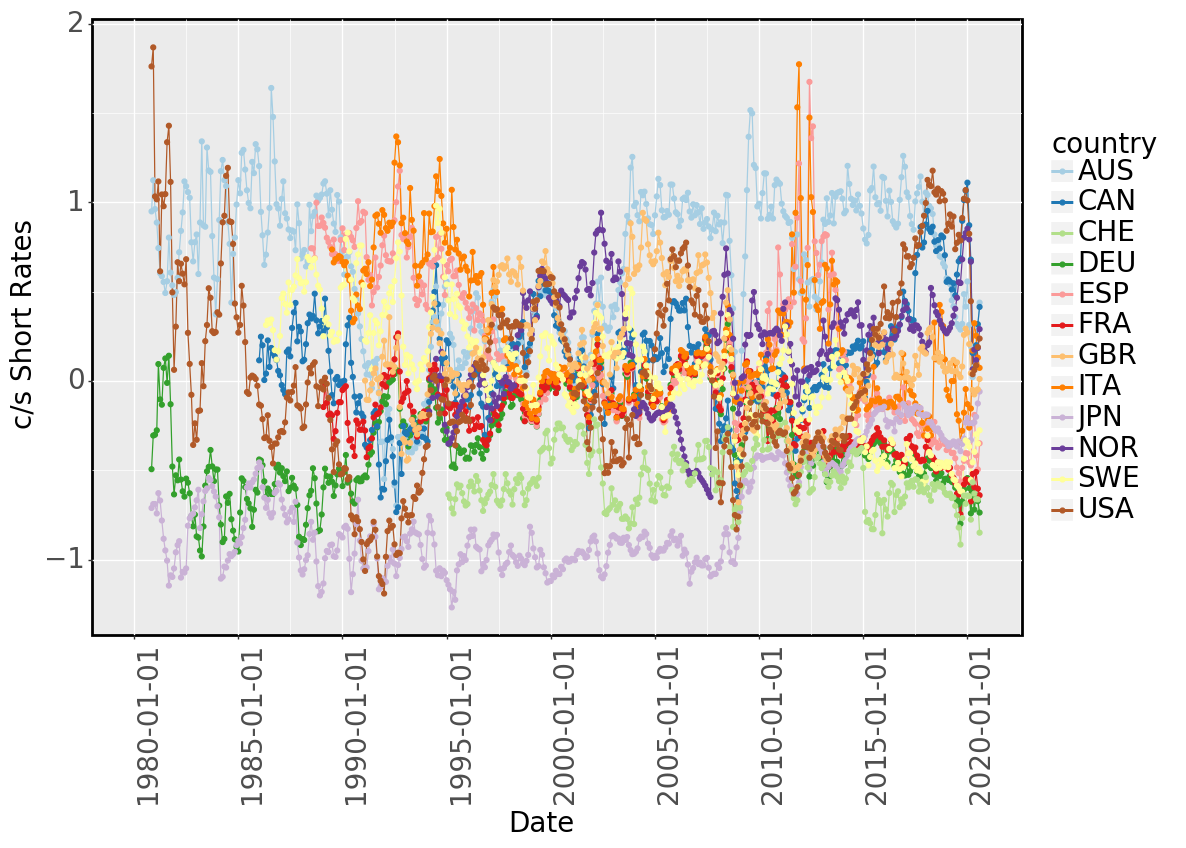

<ggplot: (8746615315625)>

In [162]:
plot_forward_centered_scaled('ShortRates', 'c/s Short Rates')

/home/dcdanko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dcdanko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/home/dcdanko/minicond

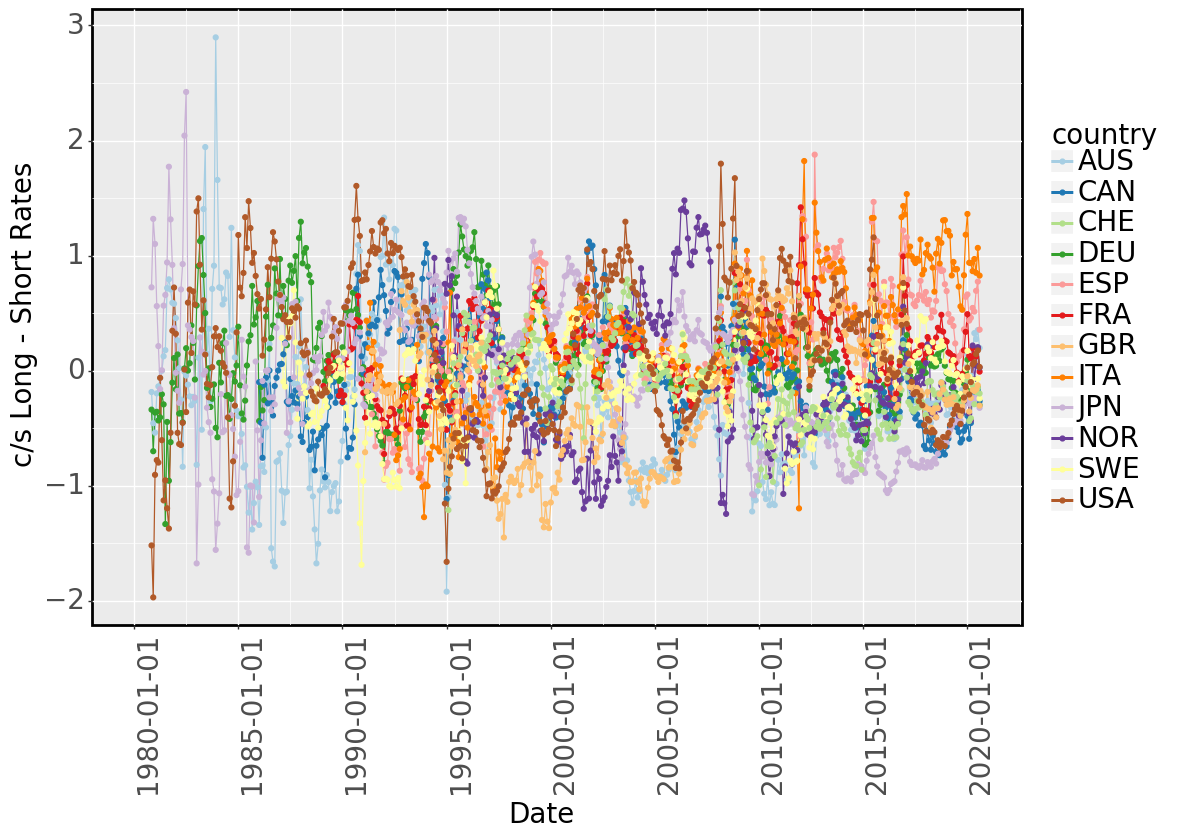

<ggplot: (8746621387093)>

In [163]:
def plot_forward_centered_scaled(a1, a2, ylab):
    tbl = dlib.pull(a1) - dlib.pull(a2)
    center = tbl.mean(axis=1).rolling(6).apply(lambda x: x[:5].mean())
    centered = (tbl.T - center).T
    centered_scaled = (centered.T / centered.abs().max(axis=1)).T
    scale = centered.abs().max(axis=1).rolling(6).apply(lambda x: x[:5].mean())
    centered_scaled = (centered.T / scale).T

    return plot_tbl(centered_scaled.copy(), ylab)

plot_forward_centered_scaled('LongRates', 'ShortRates', 'c/s Long - Short Rates')

/home/dcdanko/miniconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


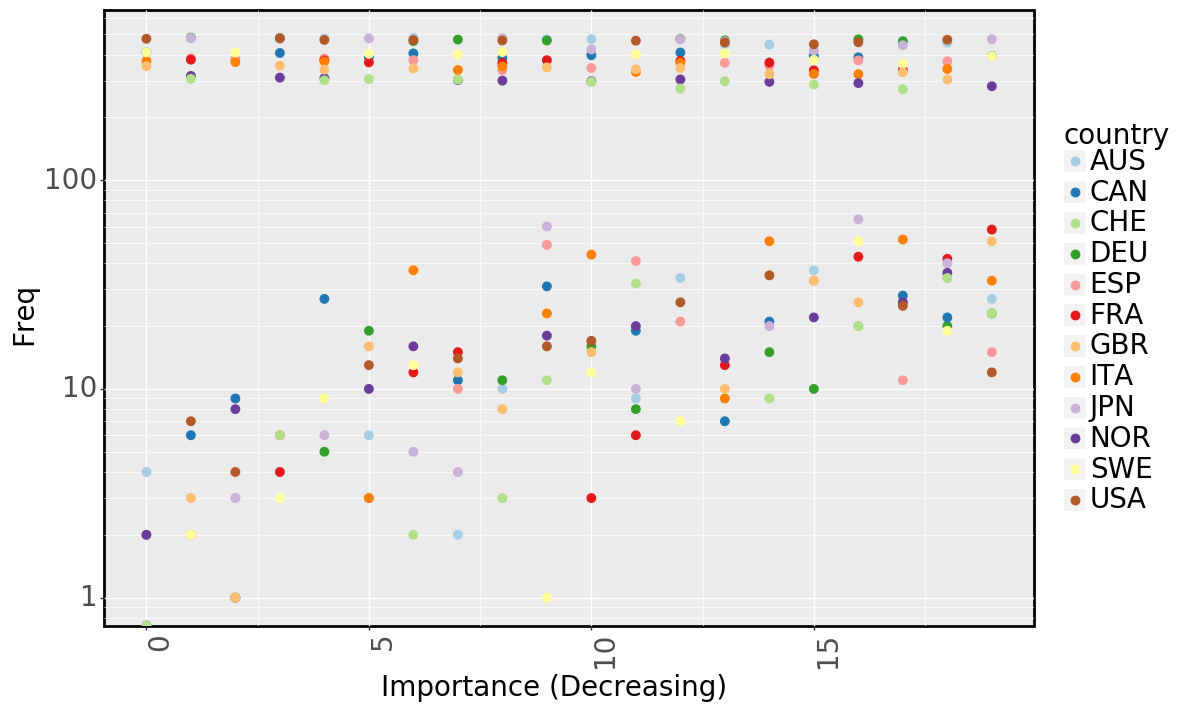

<ggplot: (-9223363290239528027)>

In [121]:
fft = centered_scaled.apply(lambda x: np.argsort(np.real(np.fft.fft(x.dropna())))[:20])

fft['freq'] = fft.index
fft = fft.melt(id_vars='freq')
fft['value'] = fft['value'].map(np.real)

(
    ggplot(fft, aes(x='freq', y='value', color='country')) +
        geom_point(size=3) +
        #geom_text(aes(label='value'), color='black') +
        scale_y_log10() +
        scale_color_brewer(type='qualitative', palette=3) +
        ylab('Freq') +
        xlab('Importance (Decreasing)') +
        theme(
            text=element_text(size=20),
            figure_size=(12, 8),
            legend_position='right',
            axis_text_x=element_text(size=20, angle=90, hjust=0),
            panel_border=element_rect(colour="black", size=2),
        )
)

/home/dcdanko/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 117 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/dcdanko/miniconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_smooth : Removed 7 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


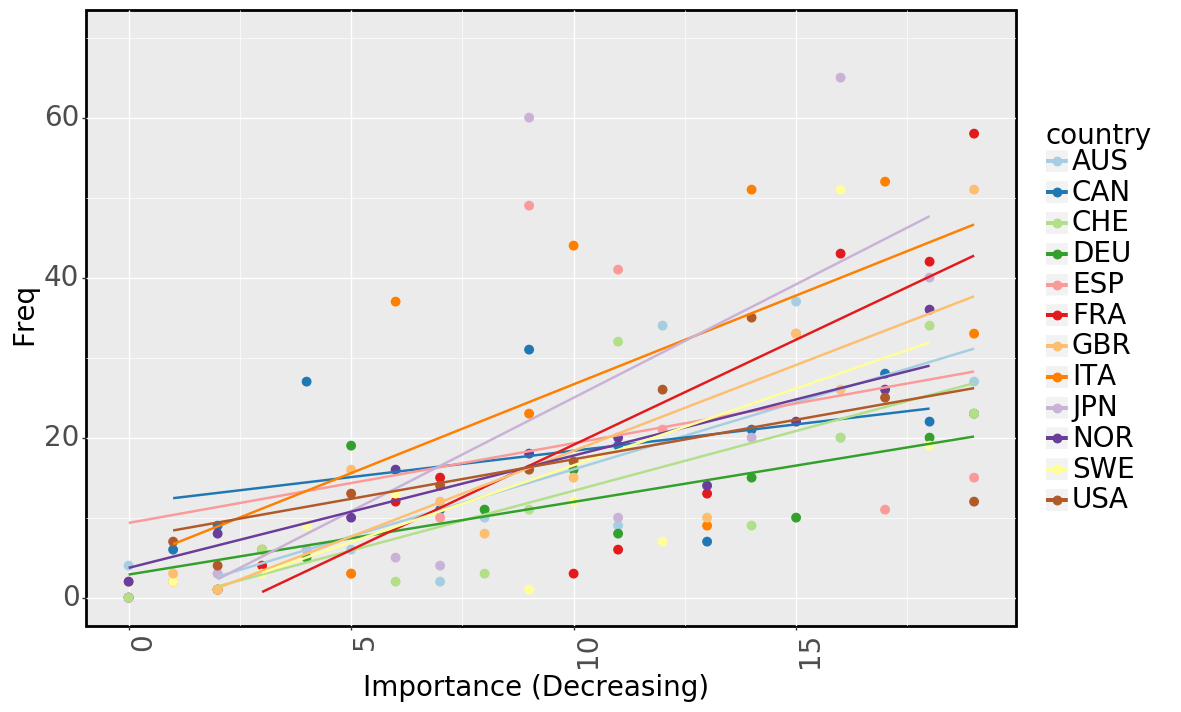

<ggplot: (8746616169455)>

In [127]:
(
    ggplot(fft, aes(x='freq', y='value', color='country')) +
        geom_point(size=3) +
        geom_smooth(method='lm', se=False) +
        #geom_text(aes(label='value'), color='black') +
        scale_color_brewer(type='qualitative', palette=3) +
        ylab('Freq') +
        ylim(0, 70) +
        xlab('Importance (Decreasing)') +
        theme(
            text=element_text(size=20),
            figure_size=(12, 8),
            legend_position='right',
            axis_text_x=element_text(size=20, angle=90, hjust=0),
            panel_border=element_rect(colour="black", size=2),
        )
)

In [147]:
s = pd.Series(range(10))

s


0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [149]:
s.rolling(3).max()

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [150]:
s.rolling(3).apply(lambda x: x[:2].max())

/home/dcdanko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    8.0
dtype: float64